# Detect Objects in Image - Script

In [2]:
!python tools/infer.py --weights cfg/yolov6n.pt --source data/images/image1.jpg

Namespace(weights='cfg/yolov6n.pt', source='data/images/image1.jpg', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, save_img=True, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from cfg/yolov6n.pt

Fusing model...
Switch model to deploy modality.

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Deram\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

100%|##########| 1/1 [00:00<00:00,  2.78it/s]
Results saved to runs/inference\exp


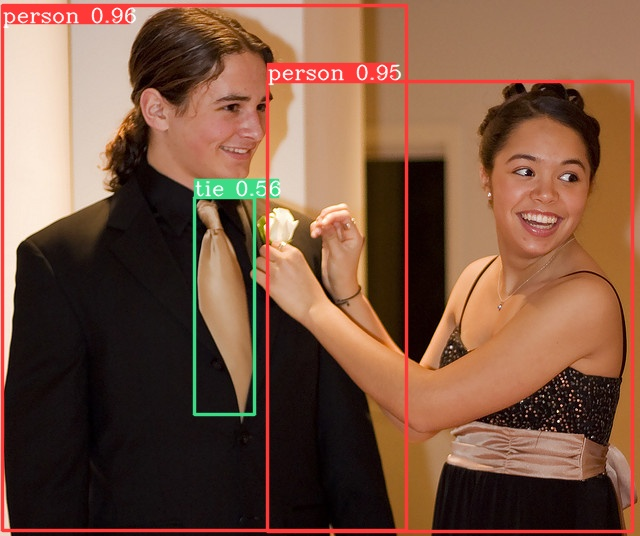

In [3]:
from IPython.display import Image
Image(filename='runs/inference/exp/image1.jpg')

# import cv2

# img = cv2.imread('runs/inference/exp/image1.jpg')
# cv2.imshow('Image', img)
# cv2.waitKey(0)
        
# cv2.destroyAllWindows()

# Detect Objects in Video - Script

In [3]:
!python tools/infer.py --weights cfg/yolov6n.pt --source data/images/street.mp4

Namespace(weights='cfg/yolov6n.pt', source='data/images/street.mp4', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, save_img=True, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from cfg/yolov6n.pt

Fusing model...
Switch model to deploy modality.

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Deram\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

100%|##########| 1/1 [00:00<00:00,  3.20it/s]
2it [00:00,  3.75it/s]                       
3it [00:00,  3.97it/

Results saved to runs/inference\exp


In [5]:
import cv2

cap = cv2.VideoCapture('runs/inference/exp/street.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break 
        
cap.release()
cv2.destroyAllWindows()

In [9]:
# View video only (but not save it)
!python tools/infer.py --weights cfg/yolov6n.pt --source data/images/street.mp4 --view-img --save-img

Namespace(weights='cfg/yolov6n.pt', source='../images/test3.mp4', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, save_img=True, save_dir=None, view_img=True, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from cfg/yolov6n.pt

Fusing model...
Switch model to deploy modality.

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Deram\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

100%|##########| 1/1 [00:00<00:00,  1.32it/s]
2it [00:01,  1.40it/s]                       
3it [00:02,  1.37it/s]
4

# Detect Objects in Image - Python

In [1]:
from yolov6.core.inferer import Inferer
import cv2

source = 'image1.jpg'
indir = 'data/images/'
outdir = 'runs/inference/exp/'

weights = 'cfg/yolov6n.pt'
device = 'cpu'
class_names = 'data/coco.yaml'
img_size = 640
half = False

inferer = Inferer(indir + source, 
                  weights, 
                  device, 
                  class_names, 
                  img_size, 
                  half)

conf_thres = 0.40
iou_thres = 0.45
classes = None
agnostic_nms = False
max_det = 1000
save_txt = False
save_img = True
hide_labels = False
hide_conf = False
view_img = True

inferer.infer(conf_thres, 
              iou_thres, 
              classes, 
              agnostic_nms, 
              max_det, 
              outdir, 
              save_txt, 
              save_img, 
              hide_labels, 
              hide_conf, 
              view_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Loading checkpoint from cfg/yolov6n.pt

Fusing model...
Switch model to deploy modality.
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\Deram\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.44it/s]


# Detect Objects in Video File - Python

In [13]:
from yolov6.core.inferer import Inferer
import cv2

# source = 'test3.mp4'
source = 'street.mp4'
indir = 'data/images/'
outdir = 'runs/inference/exp/'

weights = 'cfg/yolov6n.pt'
device = 'cpu'
class_names = 'data/coco.yaml'
img_size = 640
half = False

inferer = Inferer(indir + source, 
                  weights, 
                  device, 
                  class_names, 
                  img_size, 
                  half)

conf_thres = 0.40
iou_thres = 0.45
classes = None
agnostic_nms = False
max_det = 1000
save_txt = False
save_img = True
hide_labels = False
hide_conf = False
view_img = True

inferer.infer(conf_thres, 
              iou_thres, 
              classes, 
              agnostic_nms, 
              max_det, 
              outdir, 
              save_txt, 
              save_img, 
              hide_labels, 
              hide_conf, 
              view_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Loading checkpoint from cfg/yolov6n.pt

Fusing model...
Switch model to deploy modality.
368it [01:40,  3.67it/s]                                                                                               


# Detect Objects in Webcam/Videofile - Python

In [1]:
from yolov6_vc.imageInference import Inferer
import cv2
import numpy as np

source = 'data/images/street.mp4'

weights = 'cfg/yolov6n.pt'
device = 'cpu'
class_names = 'data/coco.yaml'
img_size = 640
half = False
conf_thres = 0.40
iou_thres = 0.45
classes = None
agnostic_nms = False
max_det = 1000

inferer = Inferer(
    '',
    weights,
    device,
    class_names,
    img_size,
    half,
    conf_thres,
    iou_thres,
    classes,
    agnostic_nms,
    max_det
)

stride = inferer.model.stride 

# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(source)
while cap.isOpened():
    ret, img_src = cap.read()
    image, img_src = inferer.precess_image(img_src)    
    detection = inferer.infer(image, img_src)
    for *xyxy, conf, cls in reversed(detection):
        class_num = int(cls)
        label = f'{inferer.class_names[class_num]} {conf:.2f}'
        inferer.plot_box_and_label(img_src, max(round(sum(img_src.shape) / 2 * 0.003), 2), xyxy, label,
                                   color=inferer.generate_colors(class_num, True), fps=None)

    image = np.asarray(img_src)
    cv2.imshow('Video', image)
    if cv2.waitKey(1)==27:
        break
        
cap.release()
cv2.destroyAllWindows()

Loading checkpoint from cfg/yolov6n.pt

Fusing model...
Switch model to deploy modality.
C:\Users\Deram\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
